In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
import matplotlib as mpl
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel
from matplotlib.colors import LogNorm
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ds1 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/DD0600/DD0600')
ds2 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_nref10f_selfshield_z6/DD0600/DD0600')

ad1 = ds1.all_data()
ad2 = ds2.all_data()

yt : [INFO     ] 2018-11-15 19:40:18,302 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-11-15 19:40:18,303 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-15 19:40:18,308 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-15 19:40:18,309 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-15 19:40:18,311 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-15 19:40:18,312 Parameters: current_redshift          = 1.67203863787
yt : [INFO     ] 2018-11-15 19:40:18,314 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-11-15 19:40:18,315 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-11-15 19:40:18,317 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-11-15 19:40:18,347 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-11-15 19:40:18,348 Parameters: domain_dimensions         = [256 256 25

In [3]:
anchor_xs_box_avg1, anchor_ys_box_avg1, anchor_zs_box_avg1, anchor_vxs_box_avg1, anchor_vys_box_avg1, anchor_vzs_box_avg1, anchor_xs_avg1, anchor_ys_avg1, anchor_zs_avg1, anchor_vxs_avg1, anchor_vys_avg1, anchor_vzs_avg1 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/anchor_files/nref11n_selfshield_z15_DD0600_cen.npy')[()]
anchor_xs_box_avg2, anchor_ys_box_avg2, anchor_zs_box_avg2, anchor_vxs_box_avg2, anchor_vys_box_avg2, anchor_vzs_box_avg2, anchor_xs_avg2, anchor_ys_avg2, anchor_zs_avg2, anchor_vxs_avg2, anchor_vys_avg2, anchor_vzs_avg2 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/anchor_files/nref11n_nref10f_selfshield_z6_DD0600_cen.npy')[()]

In [4]:
gas_vx_1 = ad1['gas', 'velocity_x']
gas_vy_1 = ad1['gas', 'velocity_y']
gas_vz_1 = ad1['gas', 'velocity_z']

gas_x_1 = ad1['gas', 'x']
gas_y_1 = ad1['gas', 'y']
gas_z_1 = ad1['gas', 'z']



gas_vx_2 = ad2['gas', 'velocity_x']
gas_vy_2 = ad2['gas', 'velocity_y']
gas_vz_2 = ad2['gas', 'velocity_z']

gas_x_2 = ad2['gas', 'x']
gas_y_2 = ad2['gas', 'y']
gas_z_2 = ad2['gas', 'z']

gas_dn_1 = ad1['gas', 'density']
gas_dn_2 = ad2['gas', 'density']



Parsing Hierarchy : 100%|██████████| 1177/1177 [00:00<00:00, 23467.29it/s]
yt : [INFO     ] 2018-11-15 19:40:21,618 Gathering a field list (this may take a moment.)
Parsing Hierarchy : 100%|██████████| 4254/4254 [00:00<00:00, 17075.76it/s]
yt : [INFO     ] 2018-11-15 19:40:36,512 Gathering a field list (this may take a moment.)


In [5]:
gas_dn_1_o = ad1['gas', 'density']
gas_dn_2_o = ad2['gas', 'density']



In [6]:
dx1_o = ad1['gas', 'dx']
dx2_o = ad2['gas', 'dx']

A1_o = dx1_o**3.
A2_o = dx2_o**3.

In [7]:
gas_vx_1_gal = gas_vx_1.to('km/s').value - anchor_vxs_box_avg1
gas_vy_1_gal = gas_vy_1.to('km/s').value - anchor_vys_box_avg1
gas_vz_1_gal = gas_vz_1.to('km/s').value - anchor_vzs_box_avg1

gas_x_1_gal = gas_x_1.to('kpc').value - anchor_xs_box_avg1
gas_y_1_gal = gas_y_1.to('kpc').value - anchor_ys_box_avg1
gas_z_1_gal = gas_z_1.to('kpc').value - anchor_zs_box_avg1




gas_vx_2_gal = gas_vx_2.to('km/s').value - anchor_vxs_box_avg2
gas_vy_2_gal = gas_vy_2.to('km/s').value - anchor_vys_box_avg2
gas_vz_2_gal = gas_vz_2.to('km/s').value - anchor_vzs_box_avg2

gas_x_2_gal = gas_x_2.to('kpc').value - anchor_xs_box_avg2
gas_y_2_gal = gas_y_2.to('kpc').value - anchor_ys_box_avg2
gas_z_2_gal = gas_z_2.to('kpc').value - anchor_zs_box_avg2




In [8]:
gas_v_1_gal_o = sqrt(gas_vx_1_gal**2. + gas_vy_1_gal**2. + gas_vz_1_gal**2.)
gas_v_2_gal_o = sqrt(gas_vx_2_gal**2. + gas_vy_2_gal**2. + gas_vz_2_gal**2.)

gas_p_1_gal_o = sqrt(gas_x_1_gal**2. + gas_y_1_gal**2. + gas_z_1_gal**2.)
gas_p_2_gal_o = sqrt(gas_x_2_gal**2. + gas_y_2_gal**2. + gas_z_2_gal**2.)



In [9]:
gas_v_1_gal = gas_v_1_gal_o[gas_p_1_gal_o < 100] 
gas_v_2_gal = gas_v_2_gal_o[gas_p_2_gal_o < 100]
gas_p_1_gal = gas_p_1_gal_o[gas_p_1_gal_o < 100]
gas_p_2_gal = gas_p_2_gal_o[gas_p_2_gal_o < 100]



A1 = A1_o[gas_p_1_gal_o < 100]
A2 = A2_o[gas_p_2_gal_o < 100]

gas_dn_1 = gas_dn_1_o[gas_p_1_gal_o < 100]
gas_dn_2 = gas_dn_2_o[gas_p_2_gal_o < 100]




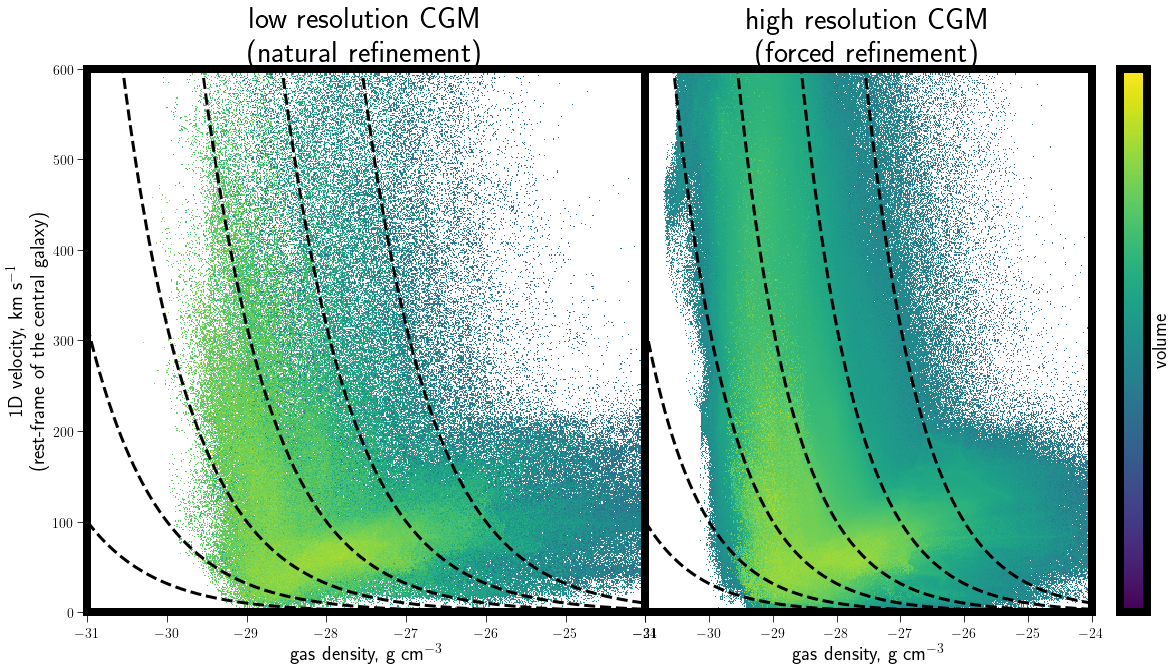

In [14]:
mpl.rcParams['axes.linewidth'] = 8
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10


fig, axes = plt.subplots(1,2, figsize = (20,10))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500


P1 = (gas_v_1_gal/sqrt(3))**2. * gas_dn_1
P2 = (gas_v_2_gal/sqrt(3))**2. * gas_dn_2

vmn = 1.e-12
vmx = 5.e-1
im1 = axes[0].hist2d(log10(gas_dn_1),gas_v_1_gal/sqrt(3), weights = A1,normed = True, norm = LogNorm(), vmin = vmn, vmax = vmx, bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])
im2 = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2,normed = True, norm = LogNorm(), vmin = vmn, vmax = vmx,bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])


#stf = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2, norm = LogNorm(), bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])


for ax in axes:
    ax.set_xlabel(r'gas density, g cm$^{-3}$', fontsize = 20)

axes[0].set_ylabel('1D velocity, km s$^{-1}$ \n(rest-frame of the central galaxy)', fontsize = 20)
axes[1].set_ylabel('')

axes[1].set_yticks([])

Ps = yt.YTArray([1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12], 'dyn/cm**2')

dns = yt.YTArray([1.*10**d for d in linspace(-31, -23, 300)], 'g/cm**3')

for P in Ps:
    vs = sqrt(P/(dns)).to('km/s')
    axes[0].plot(log10(dns), vs, 'k--', linewidth = 3)    
    axes[1].plot(log10(dns), vs, 'k--', linewidth = 3)    
    
    
    
for ax in axes.ravel():
    ax.set_xlim(mnd, mxd)
    ax.set_ylim(mnv, mxv)
    
    
cbar = plt.colorbar(im2[3], ax = axes[1])


axes[0].set_title('low resolution CGM \n(natural refinement)', fontsize = 30)
axes[1].set_title('high resolution CGM \n(forced refinement)', fontsize = 30)

#cbar.set_ticks({})


#cbar.ax.tick_params(labelsize = 20)

cbar.set_label('volume', fontsize = 20)

fig.subplots_adjust(wspace = 0.0)

fig.savefig('velocity_density.png', dpi = 300)




In [17]:
P1 = (gas_v_1_gal/sqrt(3))**2. * gas_dn_1
P2 = (gas_v_2_gal/sqrt(3))**2. * gas_dn_2


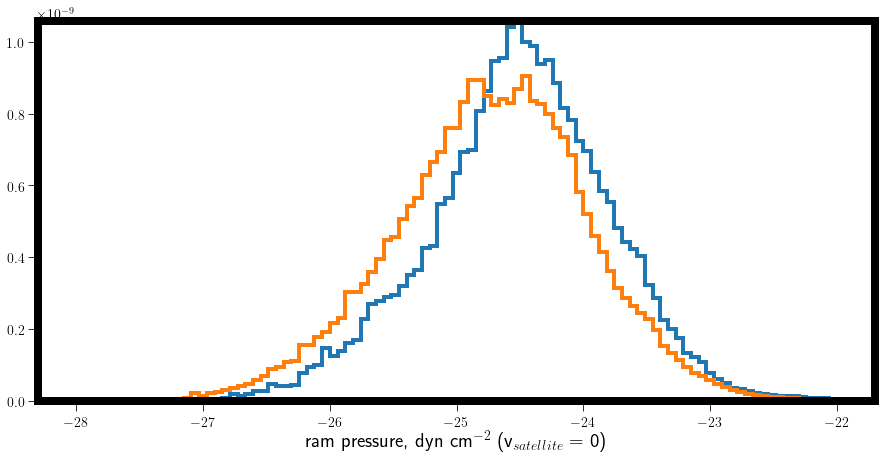

In [31]:
fig, ax = plt.subplots(1,1, figsize = (15,7))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500

ax.hist(log10(P1), weights = A1, histtype = 'step', bins = linspace(-27.5, -22, 100), linewidth = 4, '')
ax.hist(log10(P2), weights = A2, histtype = 'step', bins = linspace(-27.5, -22, 100), linewidth = 4, )


#stf = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2, norm = LogNorm(), bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])



ax.set_xlabel(r'ram pressure, dyn cm$^{-2}$ (v$_{satellite}$ = 0)', fontsize = 20)


fig.savefig('ram_pressure.png', dpi = 300)




In [22]:
P1


YTArray([7.57470618e-21, 9.46993881e-21, 1.08792411e-20, ...,
         2.19958046e-26, 1.10509322e-25, 1.09289886e-25]) g/cm**3

In [ ]:
anchor_vxs_box_avg1

In [ ]:
gas_v_2_gal

In [31]:

axes[0].set_title('low resolution CGM \n(natural refinement)', fontsize = 30, pad = 20)
axes[1].set_title('high resolution CGM \n(forced refinement)', fontsize = 30, pad = 20)

#cbar.set_ticks({})


#cbar.ax.tick_params(labelsize = 20)


cbar.set_label('volume weighted', fontsize = 24, labelpad = 15)

for ax in axes:
    ax.set_xlabel(r'gas density, g cm$^{-3}$', fontsize = 24)

axes[0].set_ylabel('1D velocity, km s$^{-1}$ \n(rest-frame of the central galaxy)', fontsize = 25)
axes[1].set_ylabel('')

#cbar.set_ticks([1.e-12, 1.e-8, 1.e-4, 1.e0])
cbar.set_ticks([])

fig.subplots_adjust(wspace = 0.05, right = 0.99)


fig.savefig('velocity_density.png', dpi = 300)


(1e-12, 0.5)